# Seleção de Features usando árvores

## 1. Carregando módulos e dados

In [1]:
# Manipulação dos dados
import numpy  as np
import scipy  as sp
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [2]:
# Carregando os dados
dados_one_hot      = pd.read_csv('../../Dados/one-hot.csv')
dados_one_hot_full = pd.read_csv('../../Dados/one-hot-total.csv')

In [3]:
# Visualização da tabela
dados_one_hot.head(5)

,desfecho,TTO_anterior_TB_triagem_enfermeiro,Cicatriz_BCG,Idade,Sexo,Raça,Tem_companheiro,Tosse,Semanas_tosse,Expectoração,...,CAGE,Estado_civil_Casado,Estado_civil_Separado,Estado_civil_Solteiro,Estado_civil_ignorado,Estado_civil_viúvo,Fuma_Ex-fumante,Fuma_Fumante,Fuma_Jamais fumante,Fuma_ignorado
0,TB+,Sim,Sim,30,Masculino,Não branco,Não,Sim,ignorado,Não,...,Não,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,TB+,Sim,ignorado,53,Feminino,Branco,Não,Sim,Não,Sim,...,Não,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,TB+,Não,Não,84,Feminino,Branco,Não,Sim,Sim,Sim,...,Não,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,TB+,Não,Sim,18,Feminino,Branco,Sim,Sim,Sim,Não,...,Não,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TB+,Sim,ignorado,36,Masculino,Não branco,Não,Sim,Não,Sim,...,Sim,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
dados_one_hot_full.head(5)

,desfecho,Idade,TTO_anterior_TB_triagem_enfermeiro_Não,TTO_anterior_TB_triagem_enfermeiro_Sim,TTO_anterior_TB_triagem_enfermeiro_ignorado,Cicatriz_BCG_Não,Cicatriz_BCG_Sim,Cicatriz_BCG_ignorado,Sexo_Feminino,Sexo_Masculino,...,Contato_TBP_2anos_Não,Contato_TBP_2anos_Sim,Contato_TBP_2anos_ignorado,Fuma_Ex-fumante,Fuma_Fumante,Fuma_Jamais fumante,Fuma_ignorado,CAGE_Não,CAGE_Sim,CAGE_ignorado
0,TB+,30,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,TB+,53,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TB+,84,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,TB+,18,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,TB+,36,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## 2. Seleção de variáveis utilizando Random forests

In [5]:
from sklearn.ensemble import RandomForestClassifier as RF
clf = RF(n_estimators=1000,n_jobs=-1)

### One-hot encoding Full

In [36]:
y = dados_one_hot_full['desfecho'].values
X = dados_one_hot_full.drop(['desfecho'],axis=1)

In [37]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
scores = clf.feature_importances_

<Container object of 3 artists>

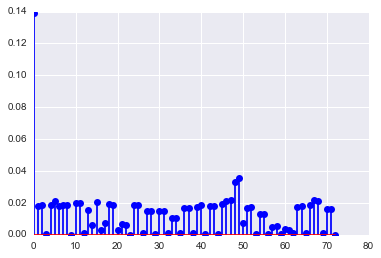

In [39]:
plt.stem(scores)

In [40]:
valores = zip(list(X.columns),clf.feature_importances_) 

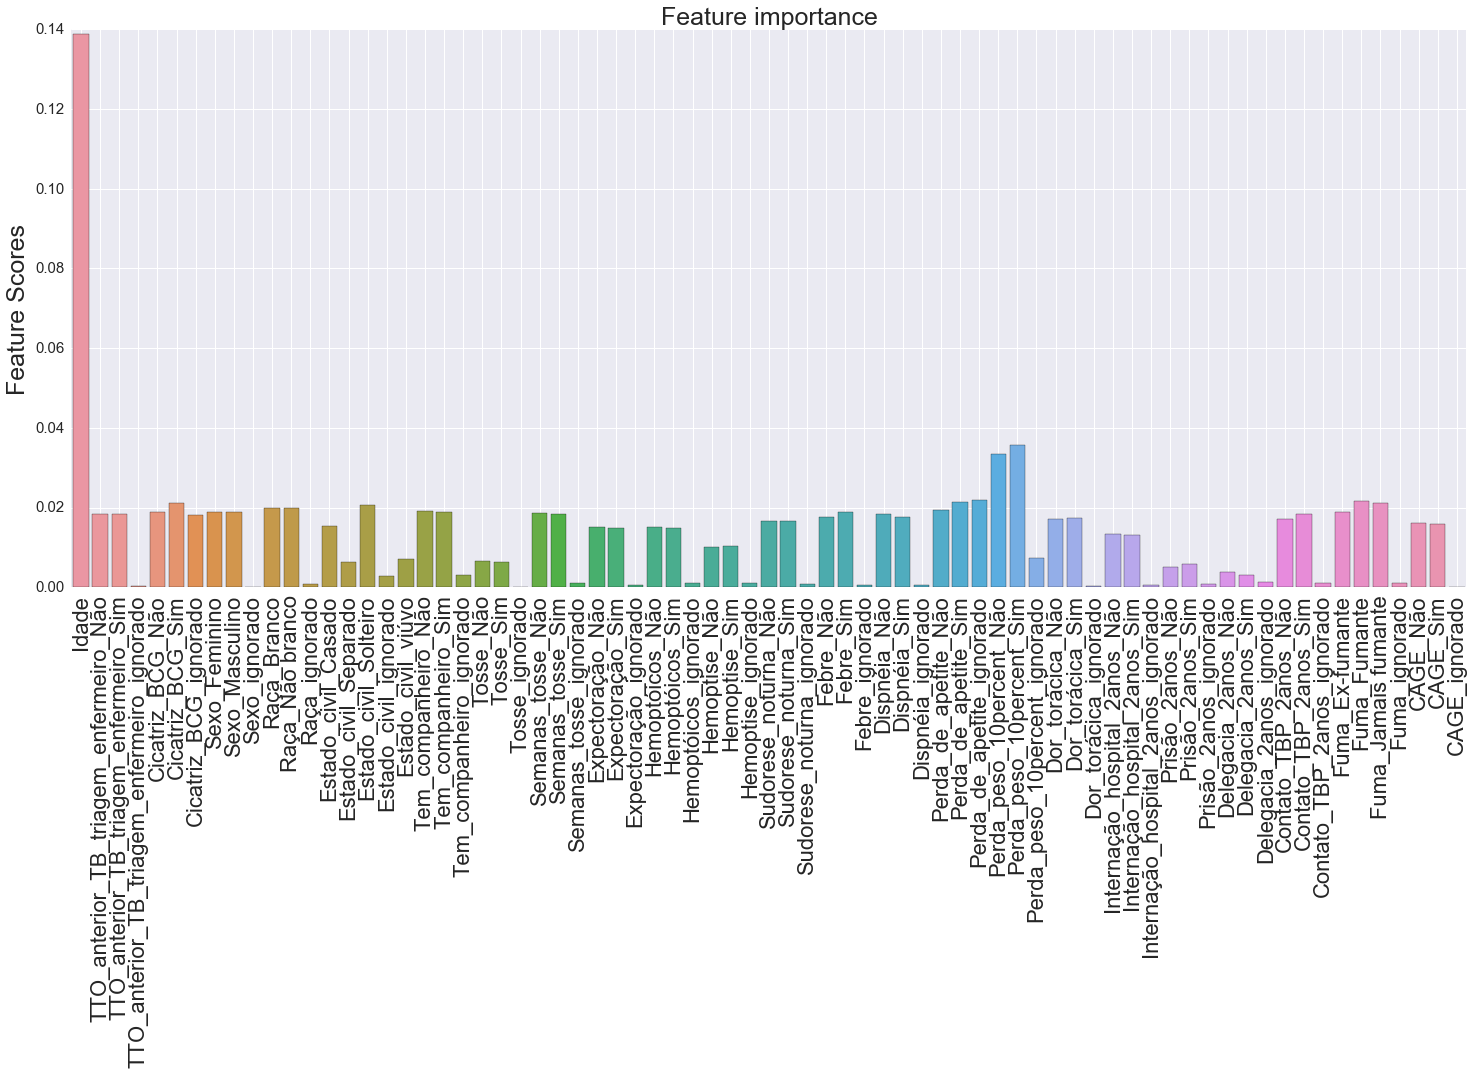

In [43]:
# Plotting
valores = zip(list(X.columns),clf.feature_importances_) 
plt.figure(figsize=(25,10))
sns.barplot(*zip(*valores))
plt.xticks(rotation=90,fontsize=22)
plt.yticks(fontsize=15)
plt.title('Feature importance',fontsize=25)
plt.ylabel('Feature Scores',fontsize=25)
plt.grid(True)
plt.show()

### One-hot encoding normal

In [14]:
y = dados_one_hot['desfecho'].values
X = dados_one_hot.drop(['desfecho'],axis=1)

In [21]:
X.replace(['Sim','Não','ignorado'],[1,-1,0],inplace=True)
X.replace(['TB+','TB-'],[1,0],inplace=True)
X.replace(['Masculino','Feminino'],[1,0],inplace=True)
X.replace(['Não branco','Branco'],[0,1],inplace=True)

In [22]:
X

,TTO_anterior_TB_triagem_enfermeiro,Cicatriz_BCG,Idade,Sexo,Raça,Tem_companheiro,Tosse,Semanas_tosse,Expectoração,Hemoptóicos,...,CAGE,Estado_civil_Casado,Estado_civil_Separado,Estado_civil_Solteiro,Estado_civil_ignorado,Estado_civil_viúvo,Fuma_Ex-fumante,Fuma_Fumante,Fuma_Jamais fumante,Fuma_ignorado
0,1,1,30,1,0,-1,1,0,-1,-1,...,-1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,53,0,1,-1,1,-1,1,-1,...,-1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-1,-1,84,0,1,-1,1,1,1,-1,...,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1,1,18,0,1,1,1,1,-1,-1,...,-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,36,1,0,-1,1,-1,1,-1,...,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,-1,1,71,1,0,1,1,1,1,1,...,-1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,-1,-1,26,1,1,1,1,1,1,1,...,-1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,-1,1,22,0,1,-1,1,-1,-1,-1,...,-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,-1,-1,54,1,0,-1,1,1,1,1,...,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1,1,52,1,0,-1,1,1,-1,-1,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
scores = clf.feature_importances_

<Container object of 3 artists>

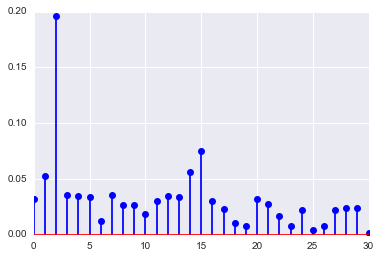

In [25]:
plt.stem(scores)

In [26]:
valores = zip(list(X.columns),clf.feature_importances_) 

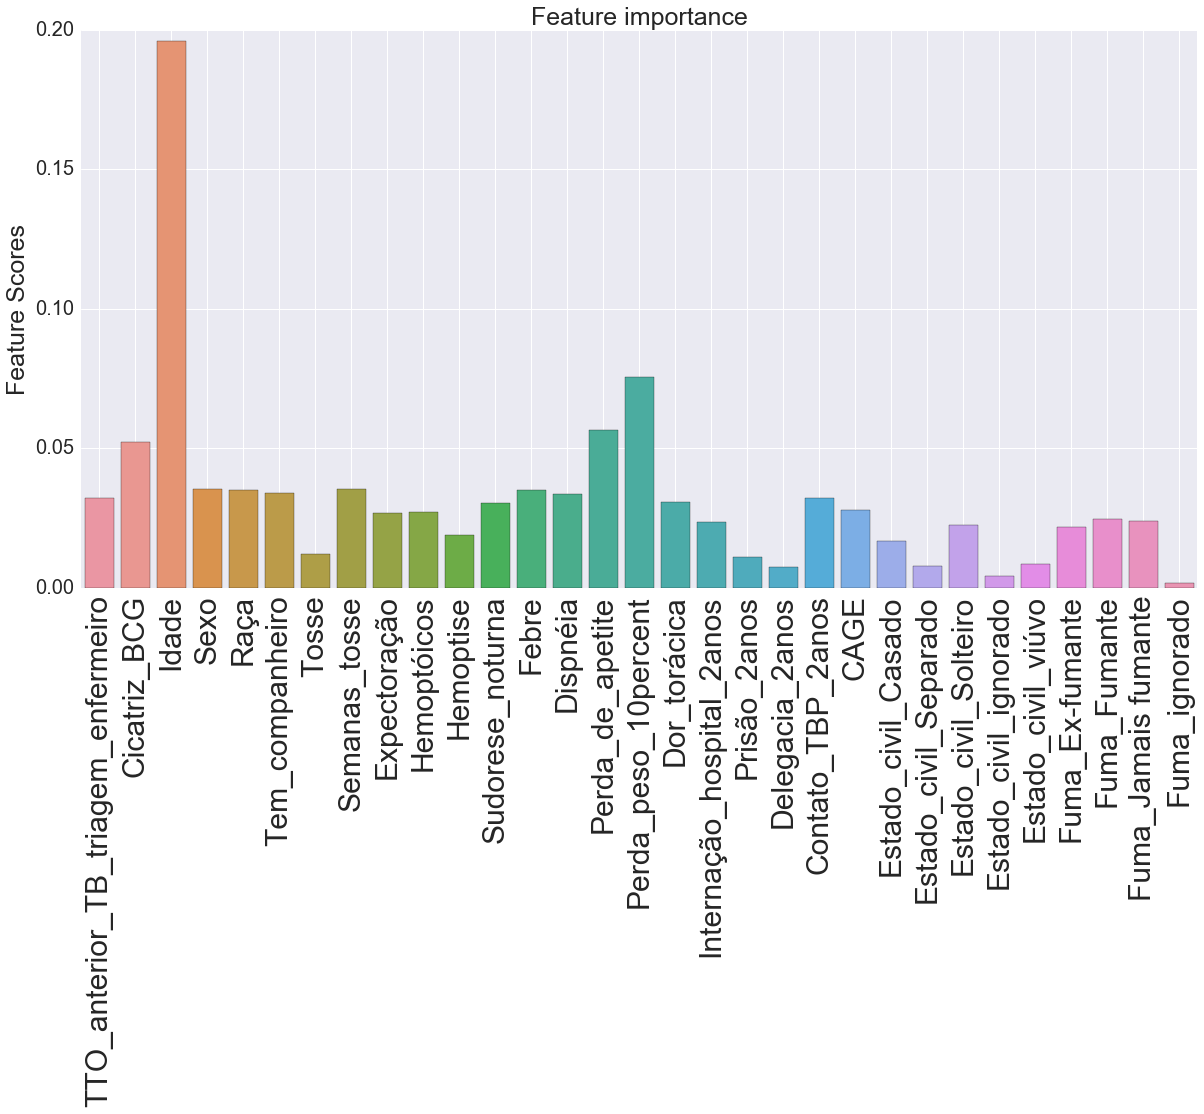

In [30]:
# Plotting
valores = zip(list(X.columns),clf.feature_importances_) 
plt.figure(figsize=(20,10))
sns.barplot(*zip(*valores))
plt.xticks(rotation=90,fontsize=30)
plt.yticks(fontsize=20)
plt.title('Feature importance',fontsize=25)
plt.ylabel('Feature Scores',fontsize=25)
plt.grid(True)
plt.show()